In [1]:
import os
if os.name=='nt':
    mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'
    os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sys import getsizeof
import time

%matplotlib inline

C:\Users\home\Anaconda3\envs\kaggle\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import pickle

def save_pickle(x, filename):
    with open(filename, 'wb') as handle:
        pickle.dump(x, handle, protocol=pickle.HIGHEST_PROTOCOL)

def read_pickle(filename):
    with open(filename, 'rb') as handle:
        x = pickle.load(handle)
    return x

In [3]:
x_train_numeric = pd.read_csv('data/train_numeric.csv.zip', index_col=0).sample(frac=0.1, random_state=0)

C:\Users\home\Anaconda3\envs\kaggle\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
y = x_train_numeric['Response'].values
x_train_numeric = x_train_numeric.iloc[:, :-1].values

In [5]:
x_train_numeric.shape

(118375, 968)

In [7]:
clf = XGBClassifier(max_depth=9, n_estimators=100, base_score=0.0058, n_jobs=8, colsample_bytree=0.6,
                   min_child_weight=5, subsample=0.9,  reg_lambda=4, silent=False, learning_rate=0.03)
clf.fit(x_train_numeric, y, eval_set=[(x_train_numeric, y)], eval_metric='auc', verbose=True)

[0]	validation_0-auc:0.774182
[1]	validation_0-auc:0.799594
[2]	validation_0-auc:0.813334
[3]	validation_0-auc:0.833794
[4]	validation_0-auc:0.848527
[5]	validation_0-auc:0.855995
[6]	validation_0-auc:0.860135
[7]	validation_0-auc:0.863198
[8]	validation_0-auc:0.867966
[9]	validation_0-auc:0.867272
[10]	validation_0-auc:0.874655
[11]	validation_0-auc:0.875129
[12]	validation_0-auc:0.878062
[13]	validation_0-auc:0.878859
[14]	validation_0-auc:0.883139
[15]	validation_0-auc:0.885627
[16]	validation_0-auc:0.885395
[17]	validation_0-auc:0.887114
[18]	validation_0-auc:0.891048
[19]	validation_0-auc:0.893624
[20]	validation_0-auc:0.8945
[21]	validation_0-auc:0.895241
[22]	validation_0-auc:0.8955
[23]	validation_0-auc:0.897085
[24]	validation_0-auc:0.89751
[25]	validation_0-auc:0.899504
[26]	validation_0-auc:0.900527
[27]	validation_0-auc:0.90137
[28]	validation_0-auc:0.902425
[29]	validation_0-auc:0.903819
[30]	validation_0-auc:0.904694
[31]	validation_0-auc:0.904644
[32]	validation_0-auc:0.

XGBClassifier(base_score=0.0058, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=9, min_child_weight=5, missing=None, n_estimators=100,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=4, scale_pos_weight=1, seed=None,
       silent=False, subsample=0.9)

In [8]:
important_feature_index = np.argsort(clf.feature_importances_)[::-1]

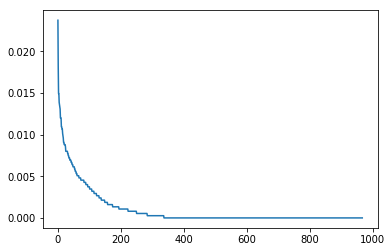

In [9]:
plt.plot(clf.feature_importances_[important_feature_index])

In [29]:
important_feature_index = np.where(clf.feature_importances_>0.002)[0]
x_train_numeric = pd.read_csv('data/train_numeric.csv.zip', index_col=0, nrows=0)
important_features = x_train_numeric.columns[important_feature_index]

important_features = pd.Series(important_features)

important_features.to_csv('important_numeric_features.csv')